In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [16]:
cols = ["class","lepton pT","lepton eta","lepton phi","missing energy magnitude","missing energy phi","jet 1 pt","jet 1 eta","jet 1 phi","jet 1 b-tag","jet 2 pt","jet 2 eta", "jet 2 phi","jet 2 b-tag","jet 3 pt","jet 3 eta","jet 3 phi","jet 3 b-tag","jet 4 pt","jet 4 eta","jet 4 phi","jet 4b-tag","m_jj","m_jjj","m_lv","m_ilv","m_bb","m_wbb","m_wwbb"]
df = pd.read_csv("HIGGS.csv", names = cols)
df.head()

KeyboardInterrupt: 

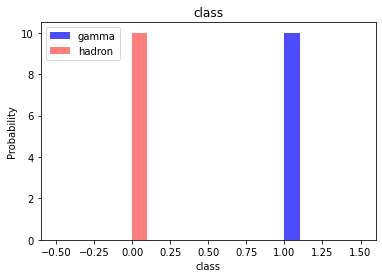

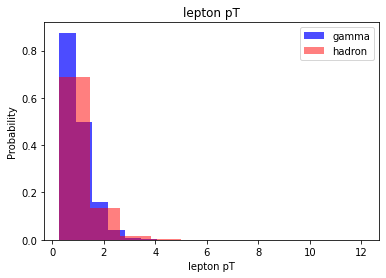

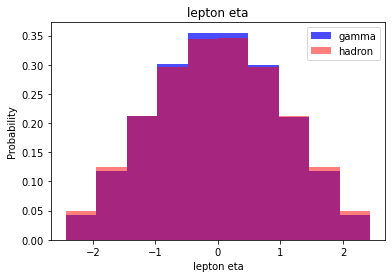

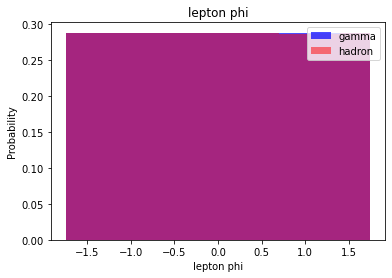

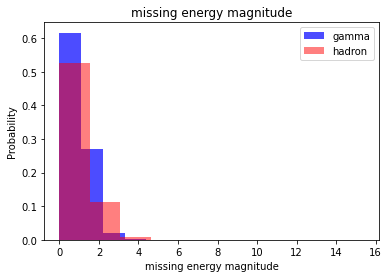

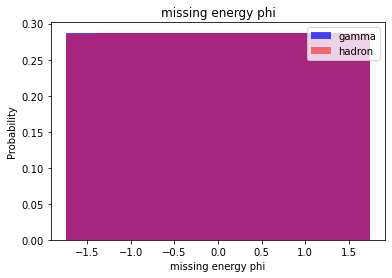

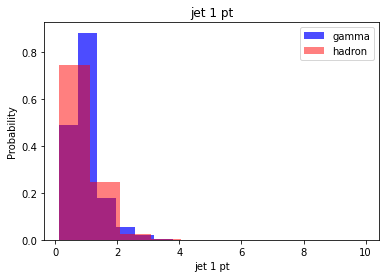

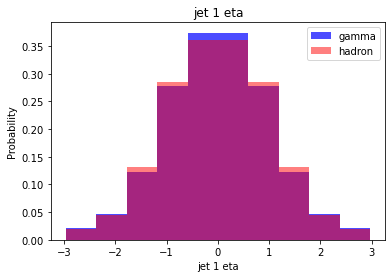

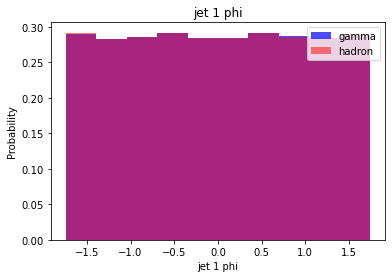

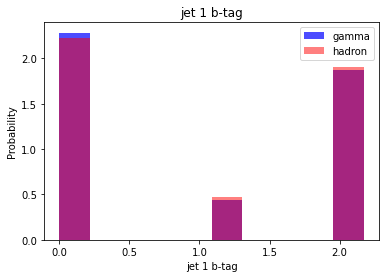

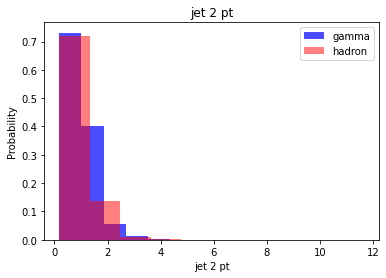

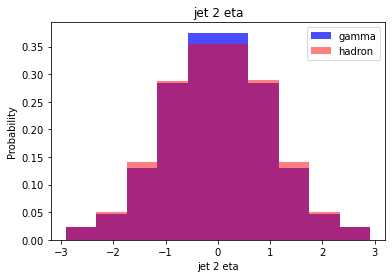

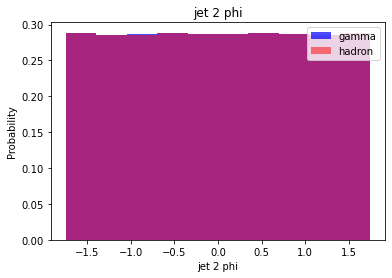

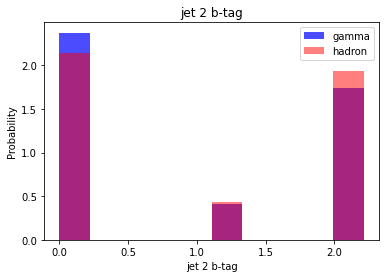

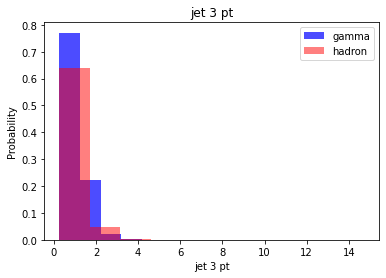

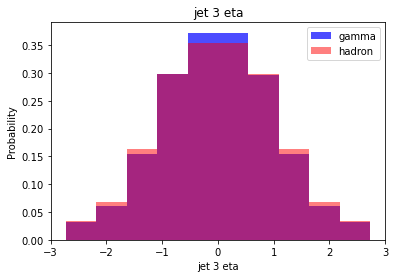

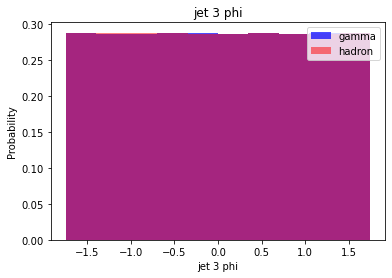

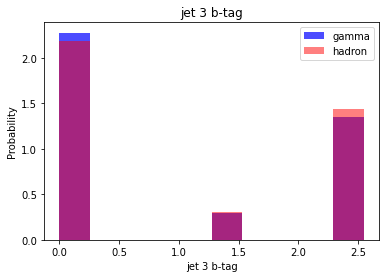

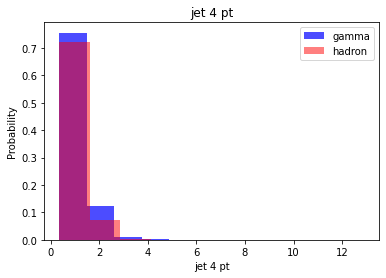

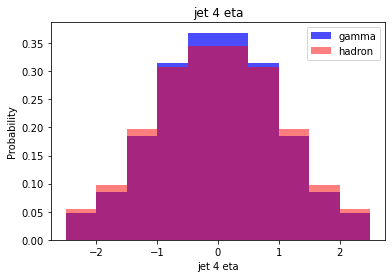

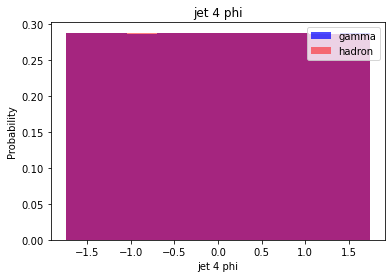

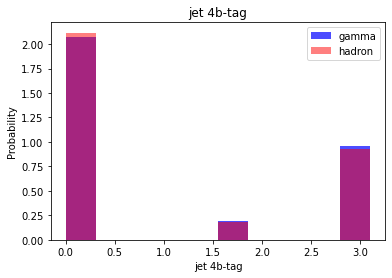

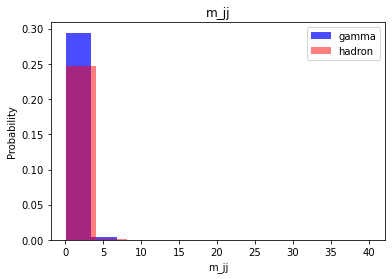

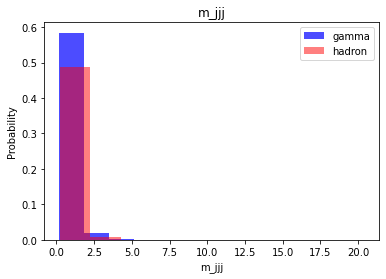

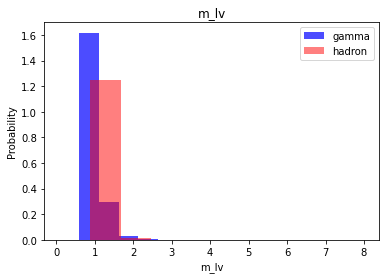

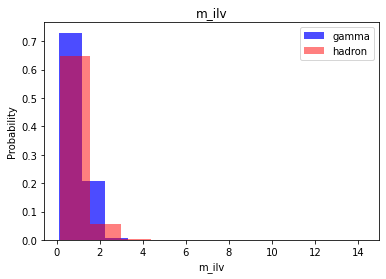

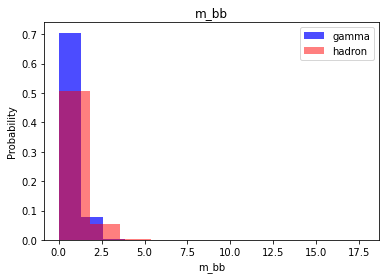

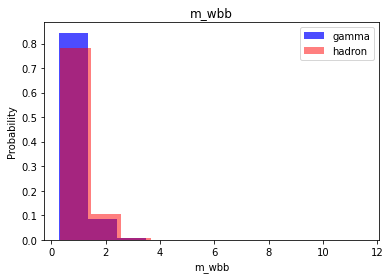

In [17]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label],color = 'blue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(df[df["class"] == 0][label],color = 'red', label = 'hadron', alpha = 0.5, density = True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [18]:
#Training Data set

In [19]:
train, valid, test = np.split(df.sample(frac = 1),[int(0.6*len(df)),int(0.8*len(df))])

In [26]:
def scale_dataset(dataframe, oversample = False):
    x = dataframe[dataframe.cols[:-1]].values
    y = dataframe[dataframe.cols[0]].values
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x,y)
        
    data = np.hstack((x, np.reshape(y, (-1.1))))
    return data, x, y


In [23]:
print(len(train[train["class"] == 1]))
print(len(train[train["class"] == 0]))

3497142
3102858
